In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
link = 'http://bit.ly/w-data'
df = pd.read_csv(link)

In [12]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


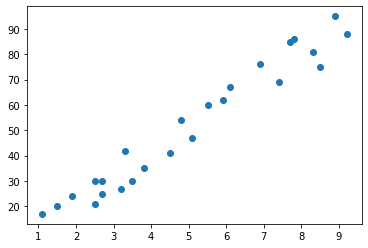

In [15]:
plt.scatter(x=df['Hours'], y=df['Scores'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

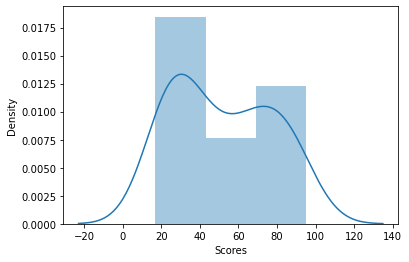

In [16]:
sns.distplot(df.loc[:,'Scores'], norm_hist=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

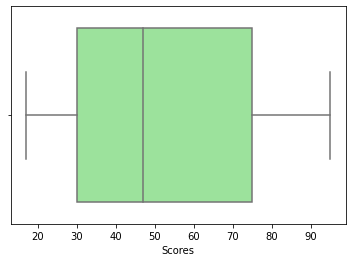

In [17]:
sns.boxplot(df.loc[:, 'Scores'], color='lightgreen')

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('Scores', axis=1)
y = df['Scores']

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [20]:

from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
print('linear regression model coeff (w):', linreg.coef_)
print('linear regression model intercept (b):', linreg.intercept_)

linear regression model coeff (w): [9.94167834]
linear regression model intercept (b): 1.9322042531516601


In [21]:
from sklearn.metrics import mean_squared_error
y_pred = linreg.predict(X_train)
rmse = mean_squared_error(y_train, y_pred)
print(rmse)
y_predicted = linreg.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
print(rmse)

32.5503770675043
20.33292367497996


In [22]:
from sklearn.metrics import r2_score
print('Training r2 score:', r2_score(y_train, y_pred))
print('Testing r2 score:', r2_score(y_test, y_predicted))

Training r2 score: 0.9484509249326872
Testing r2 score: 0.9367661043365056


In [23]:
line = linreg.coef_*df['Hours'] + linreg.intercept_

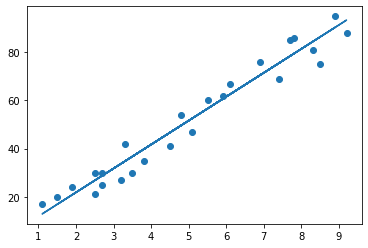

In [24]:
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.plot(df['Hours'], line)

In [25]:
linreg.predict([[9.25]])

array([93.89272889])